<a href="https://colab.research.google.com/github/noahjett/Movie-Goodreads-Analysis/blob/master/Book_Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

### Dataset 1: Goodreads-books from Kaggle
Pre-prepared dataset which aggregates book ratings and reviews from popular site 'Goodreads'

### Dataset 2: TMDB 5000 Movie Dataset from Kaggle
Data on 5000 movies scrabed from IMDB

### Import Method: From Google Drive

In [72]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
path1 = "/content/drive/My Drive/data/books.csv"
books = pd.read_csv(path1, error_bad_lines=False)

path2 = "/content/drive/My Drive/data/tmdb_5000_movies.csv"
movies = pd.read_csv(path2, error_bad_lines=False)


b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


### Goodreads: Check for Missing Values

In [74]:
books.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

### Goodreads dataset has no missing values

### Movies: Check for Missing Values

In [75]:
movies.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

We see that the 'homepage' and 'tagline' fields are empty for many entries, but these are values we are not concerned with. 

There are also a few (<=3) for other fields, but since they are so few these can likely be dropped with no effect.

In [76]:
books.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,38872,154
6,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.69,0976540606,9780976540601,en-US,152,18,1
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,27410,820
8,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3602,258
9,13,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.38,0345453743,9780345453747,eng,815,240189,3954


### Notice how there are several formats for J.K. Rowling's name, and at least two language codes for English (eng & en-US)

### Implies some cleaning will need to be done

In [77]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [92]:
books.describe().T

,count,mean,std,min,25%,50%,75%,max
bookID,13714.00,22159.86,13700.93,1.00,10619.25,21321.50,33311.75,47709.00
average_rating,13714.00,3.93,0.36,0.00,3.77,3.96,4.13,5.00
isbn13,13714.00,9764017227989.42,398767945696.43,8987059752.00,9780345473276.50,9780613030131.00,9780940450710.00,9790007672386.00
# num_pages,13714.00,342.40,252.65,0.00,196.00,301.00,421.00,6576.00
ratings_count,13714.00,17765.40,112957.23,0.00,83.00,630.50,4742.25,5629932.00
text_reviews_count,13714.00,533.63,2529.01,0.00,7.00,40.00,222.00,93619.00


### What authors have published the most books?

In [79]:
most_published_authors = books['authors'].value_counts()[:10]
mostcounts = most_published_authors.reset_index()
mostcounts


,index,authors
0,Agatha Christie,69
1,Stephen King,66
2,Orson Scott Card,48
3,Rumiko Takahashi,46
4,P.G. Wodehouse,42
5,Terry Brooks,40
6,Piers Anthony,34
7,Margaret Weis-Tracy Hickman,33
8,Dan Simmons,32
9,Gabriel García Márquez,31


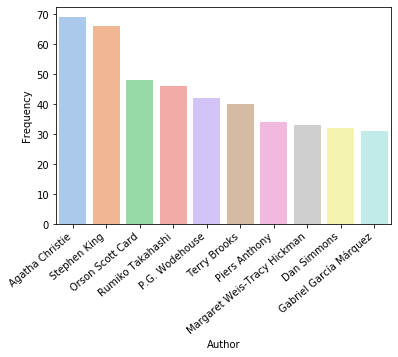

In [80]:
authorplot = sns.barplot(x = 'index',y='authors', data=mostcounts, palette="pastel")
authorplot.set_xticklabels(authorplot.get_xticklabels(), rotation=40, ha="right")
authorplot.set(xlabel='Author', ylabel='Frequency')
plt.show()

### What are the 25 highest rated books?

In [110]:
# Do with groupby?

highest_rated_all = books.sort_values('average_rating', ascending=False)[:100]
highest_rated_books = highest_rated_all[['title', 'authors', 'average_rating', 'ratings_count', 'text_reviews_count']]
highest_rated_books


,title,authors,average_rating,ratings_count,text_reviews_count
6077,The Complete Theory Fun Factory: Music Theory ...,Ian Martin-Katie Elliott,5.00,1,0
4939,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.00,2,0
963,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.00,4,1
7506,The New Big Book of America,Todd Davis-Marc Frey,5.00,2,1
11067,Bubbles in the Middle (The Powerpuff Girls Plu...,Aaron Rosenberg-Christopher Cook,5.00,5,0
...,...,...,...,...,...
13708,The Sandman: King of Dreams,Alisa Kwitney-Neil Gaiman,4.62,12775,34
11218,Organizational Architecture: Designs for Chang...,David A. Nadler-Robert B. Shaw-Marc S. Gerstein,4.62,2,0
10721,The Feynman Lectures on Physics Vol 2,Richard P. Feynman-Robert B. Leighton-Matthew ...,4.61,17,2
7555,Nausicaä de la vallée du vent tome 5,Hayao Miyazaki,4.61,55,3


### The above cell showed an important detail, that not all entries have the same amount of reviews

### Let's see what the highest rated books with at least 100 reviews are

In [115]:
highest_with_hundred = highest_rated_all[highest_rated_all['ratings_count'] >= 100][:10]
highest_with_hundred = highest_with_hundred[['title', 'authors', 'average_rating', 'ratings_count']]

fave_cols = highest_with_hundred[['title', 'average_rating']]

highest_with_hundred

,title,authors,average_rating,ratings_count
7922,The Complete Calvin and Hobbes,Bill Watterson,4.82,31249
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,38872
8400,It's A Magical World,Bill Watterson,4.76,138
7924,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,23336
7925,The Indispensable Calvin and Hobbes,Bill Watterson,4.74,15641
7,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,27410
2182,Early Color,Saul Leiter-Martin Harrison,4.73,114
7926,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,14952
7930,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,Bill Watterson,4.71,3537
12976,The Price of the Ticket: Collected Nonfiction ...,James Baldwin,4.70,396


### The world really likes Calvin and Hobbes

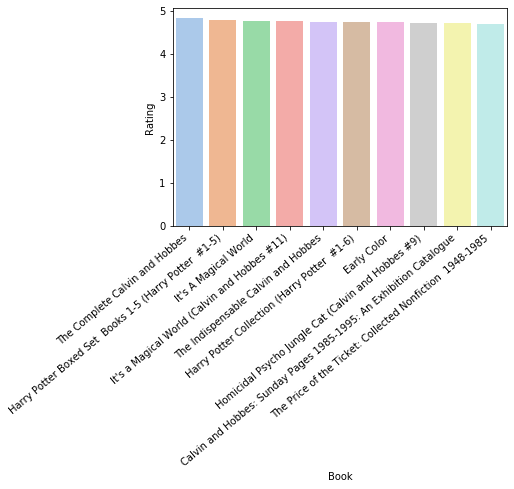

In [116]:
favebookplot = sns.barplot(x = 'title',y='average_rating', data=fave_cols, palette="pastel")
favebookplot.set_xticklabels(favebookplot.get_xticklabels(), rotation=40, ha="right")
favebookplot.set(xlabel='Book', ylabel='Rating')
plt.show()

In [121]:
books.corr()['average_rating']

bookID               -0.04
average_rating        1.00
isbn13                0.00
# num_pages           0.17
ratings_count         0.04
text_reviews_count    0.04
Name: average_rating, dtype: float64

In [82]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [83]:
movies.head(10)
;

''

In [93]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.00,29045039.88,40722391.26,0.00,790000.00,15000000.00,40000000.00,380000000.00
id,4803.00,57165.48,88694.61,5.00,9014.50,14629.00,58610.50,459488.00
popularity,4803.00,21.49,31.82,0.00,4.67,12.92,28.31,875.58
revenue,4803.00,82260638.65,162857100.94,0.00,0.00,19170001.00,92917187.00,2787965087.00
runtime,4801.00,106.88,22.61,0.00,94.00,103.00,118.00,338.00
vote_average,4803.00,6.09,1.19,0.00,5.60,6.20,6.80,10.00
vote_count,4803.00,690.22,1234.59,0.00,54.00,235.00,737.00,13752.00


### What are the highest budget movies?

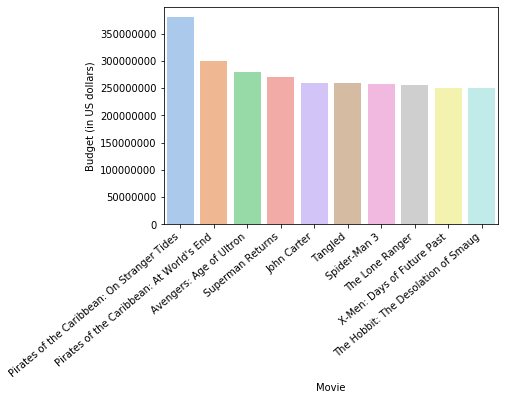

In [96]:
most_expensive_df = movies.sort_values('budget',ascending=False)[:10]

most_expensive = most_expensive_df[['title', 'budget', 'revenue']]

expensiveplot = sns.barplot(x = 'title',y='budget', data=most_expensive, palette="pastel")
expensiveplot.set_xticklabels(expensiveplot.get_xticklabels(), rotation=40, ha="right")
expensiveplot.set(xlabel='Movie', ylabel='Budget (in US dollars)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [117]:
most_expensive

,title,budget,revenue
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
1,Pirates of the Caribbean: At World's End,300000000,961000000
7,Avengers: Age of Ultron,280000000,1405403694
10,Superman Returns,270000000,391081192
4,John Carter,260000000,284139100
6,Tangled,260000000,591794936
5,Spider-Man 3,258000000,890871626
13,The Lone Ranger,255000000,89289910
46,X-Men: Days of Future Past,250000000,747862775
22,The Hobbit: The Desolation of Smaug,250000000,958400000


### What are the most popular movies?

In [86]:
most_popular_df = movies.sort_values('popularity',ascending=False)[:10]
most_popular = most_popular_df[['title', 'popularity', 'release_date']]
most_popular

,title,popularity,release_date
546,Minions,875.581305,2015-06-17
95,Interstellar,724.247784,2014-11-05
788,Deadpool,514.569956,2016-02-09
94,Guardians of the Galaxy,481.098624,2014-07-30
127,Mad Max: Fury Road,434.278564,2015-05-13
28,Jurassic World,418.708552,2015-06-09
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
82,Dawn of the Planet of the Apes,243.791743,2014-06-26
200,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
88,Big Hero 6,203.734590,2014-10-24


In [124]:
movies.corr()['popularity'].sort_values(ascending=False)

popularity     1.00
vote_count     0.78
revenue        0.64
budget         0.51
vote_average   0.27
runtime        0.23
id             0.03
Name: popularity, dtype: float64

## This section attempts to merge the two datasets


In [87]:
merged = pd.merge(books, movies)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 507
Data columns (total 29 columns):
bookID                  508 non-null int64
title                   508 non-null object
authors                 508 non-null object
average_rating          508 non-null float64
isbn                    508 non-null object
isbn13                  508 non-null int64
language_code           508 non-null object
# num_pages             508 non-null int64
ratings_count           508 non-null int64
text_reviews_count      508 non-null int64
budget                  508 non-null int64
genres                  508 non-null object
homepage                184 non-null object
id                      508 non-null int64
keywords                508 non-null object
original_language       508 non-null object
original_title          508 non-null object
overview                508 non-null object
popularity              508 non-null float64
production_companies    508 non-null object
production_countries

### Everything in this dataframe should be both a book and a movie; does that seem true?

The first entry is Hatchet by Gary Paulsen, the famous survival novel,
but it was merged with what looks like a slasher horror movie.

So this method will combine movie and books of the same title, even if they are different things.

In [118]:
merged.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,50,Hatchet,Gary Paulsen,3.70,0689840926,9780689840920,eng,208,254827,11346,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 27, ""nam...",http://www.hatchetmovie.com/,11908,"[{""id"": 2411, ""name"": ""new orleans""}, {""id"": 3...",en,Hatchet,When a group of tourists on a New Orleans haun...,12.68,"[{""name"": ""ArieScope Pictures"", ""id"": 3960}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-04-27,0,83.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Stay out of the swamp.,5.70,159
1,151,Anna Karenina,Leo Tolstoy-Richard Pevear-Larissa Volokhonsky,4.04,0143035002,9780143035008,eng,838,15747,1795,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,96724,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Anna Karenina,"Trapped in a loveless marriage, aristocrat Ann...",26.39,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2012-09-06,68929150,130.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An epic story of love.,6.50,639
2,152,Anna Karenina,Leo Tolstoy-David Magarshack-Priscilla Meyer,4.04,0451528611,9780451528612,eng,960,108970,5694,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,96724,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Anna Karenina,"Trapped in a loveless marriage, aristocrat Ann...",26.39,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2012-09-06,68929150,130.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An epic story of love.,6.50,639
3,153,Anna Karenina,Leo Tolstoy-Richard Pevear-Larissa Volokhonsky...,4.04,0140449175,9780140449174,eng,837,2835,300,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,96724,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Anna Karenina,"Trapped in a loveless marriage, aristocrat Ann...",26.39,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2012-09-06,68929150,130.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An epic story of love.,6.50,639
4,155,Anna Karenina,Leo Tolstoy-Amy Mandelker-Constance Garnett,4.04,1593080271,9781593080273,eng,803,9362,710,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,96724,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Anna Karenina,"Trapped in a loveless marriage, aristocrat Ann...",26.39,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2012-09-06,68929150,130.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An epic story of love.,6.50,639
5,156,Anna Karenina,Leo Tolstoy-Louise Maude-Aylmer Maude,4.04,0486437965,9780486437965,eng,752,460,71,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,96724,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Anna Karenina,"Trapped in a loveless marriage, aristocrat Ann...",26.39,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2012-09-06,68929150,130.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An epic story of love.,6.50,639
6,157,Anna Karenina,Leo Tolstoy-Constance Garnett-Amy Mandelker,4.04,1593081774,9781593081775,eng,803,298,47,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,96724,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Anna Karenina,"Trapped in a loveless marriage, aristocrat An